In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
file_path = 'spam.csv'
encodings = ['utf-8','latin1','ISO-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding: {encoding}")
        continue
if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")
    

failed to read with encoding: utf-8
file successfully read with encoding:latin1
CSV file has been successfully loaded


In [39]:
df.sample(5)

v1                                                 v2  \
3066  ham                            Ok. So april. Cant wait   
3122  ham  He telling not to tell any one. If so treat fo...   
604   ham                             Meet after lunch la...   
214   ham                    Sounds great! Are you home now?   
3110  ham               Short But Cute : \ Be a good person    

                                       Unnamed: 2 Unnamed: 3 Unnamed: 4  
3066                                          NaN        NaN        NaN  
3122                                          NaN        NaN        NaN  
604                                           NaN        NaN        NaN  
214                                           NaN        NaN        NaN  
3110   but dont try to prove\" ..... Gud mrng..."        NaN        NaN

In [40]:
df.shape

(5572, 5)

# Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [43]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [44]:
df = df.rename(columns={'v1':'Target','v2':'Text'})

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [46]:
df['Target'] = encoder.fit_transform(df['Target'])
#spam=1
#ham=0

In [47]:
df.head()

Target                                               Text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [48]:
#check if there are any null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [49]:
#check for duplicate values
df.duplicated().sum()

403

In [50]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [51]:
df.duplicated().sum()

0

In [52]:
df.shape

(5169, 2)

# EDA

In [53]:
df.head()

Target                                               Text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [54]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

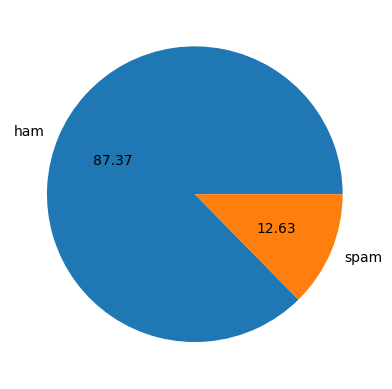

In [55]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct='%0.2f')
plt.show()

Big chunk of ham and very less spam so data is not balanced

In [56]:
import nltk

In [57]:
!pip install nltk

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowmya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
df['num_characters'] = df['Text'].apply(len)

In [60]:
df.head()

Target                                               Text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [61]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [62]:
df.head()

Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [63]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [64]:
df.head()

Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [65]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [66]:
df[df['Target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [67]:
df[df['Target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [68]:
df[df['Target']==1]

Target                                               Text  \
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
5          1  FreeMsg Hey there darling it's been 3 week's n...   
8          1  WINNER!! As a valued network customer you have...   
9          1  Had your mobile 11 months or more? U R entitle...   
11         1  SIX chances to win CASH! From 100 to 20,000 po...   
...      ...                                                ...   
5537       1  Want explicit SEX in 30 secs? Ring 02073162414...   
5540       1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...   
5547       1  Had your contract mobile 11 Mnths? Latest Moto...   
5566       1  REMINDER FROM O2: To get 2.50 pounds free call...   
5567       1  This is the 2nd time we have tried 2 contact u...   

      num_characters  num_words  num_sentences  
2                155         37              2  
5                148         39              4  
8                158         32              5  
9                154         31              3  
11               136         31              3  
...              ...        ...            ...  
5537              90         18              3  
5540             160         38              6  
5547             160         35              5  
5566             147         30              1  
5567             161         35              4  

[653 rows x 5 columns]

In [69]:
!pip install seaborn
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

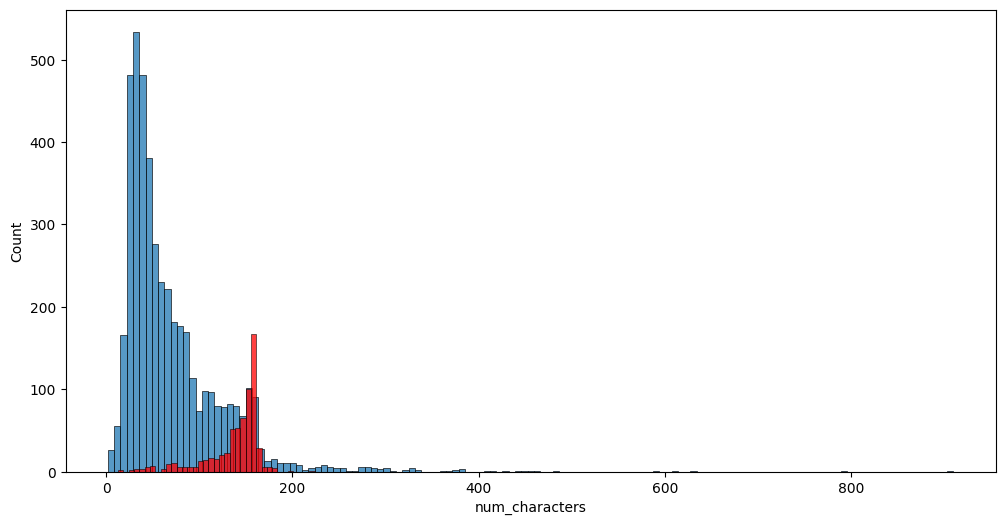

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

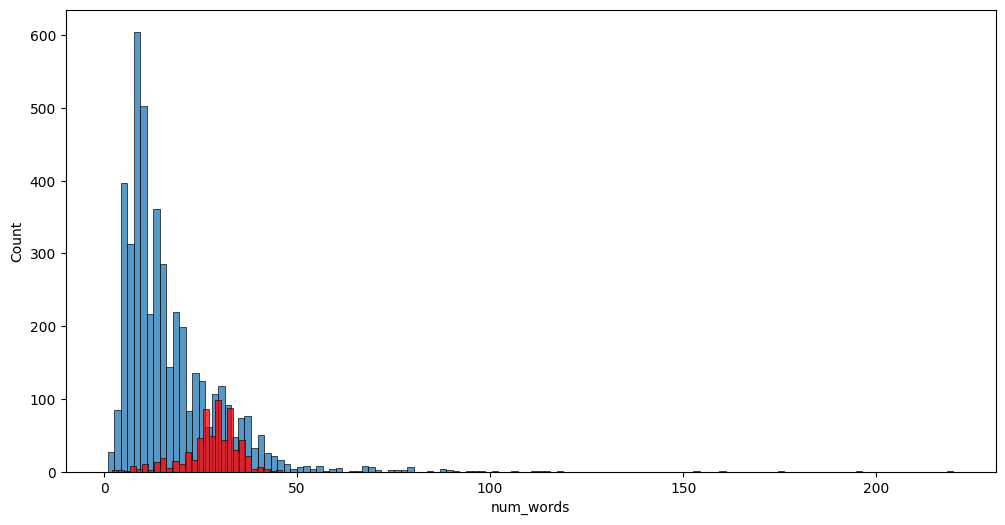

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color='red')

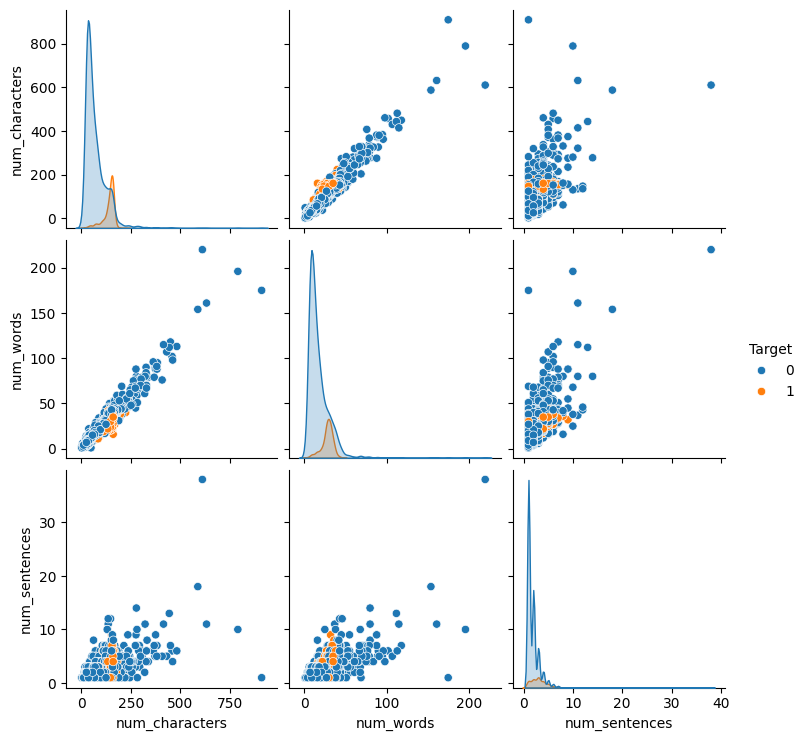

In [72]:
sns.pairplot(df, hue='Target')

<Axes: >

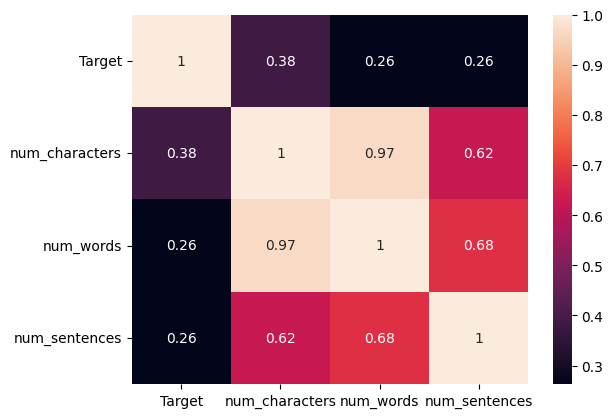

In [73]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)

# Data Preprocessing

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [75]:
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon and I dont't want to talk about this stuff anymore tonight, k? I've cried enough today")
print(transformed_text)

i gon na be home soon and i want to talk about thi stuff anymor tonight k i cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowmya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [77]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [78]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [79]:
df.head()

Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go until jurong point crazi avail onli in bugi...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri in 2 a wkli comp to win fa cup fina...  
3         13              1        u dun say so earli hor u c alreadi then say  
4         15              1  nah i do think he goe to usf he live around he...

In [80]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [81]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

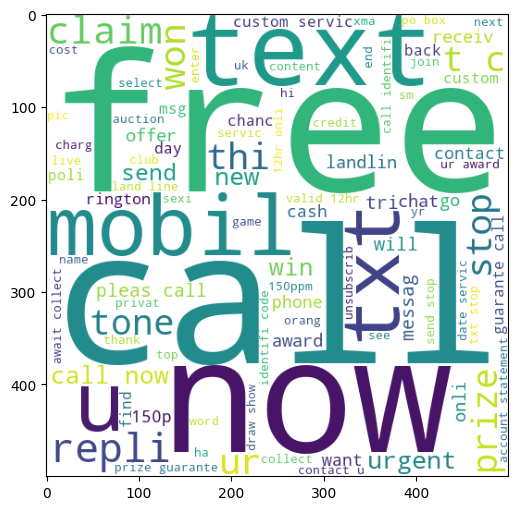

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [83]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

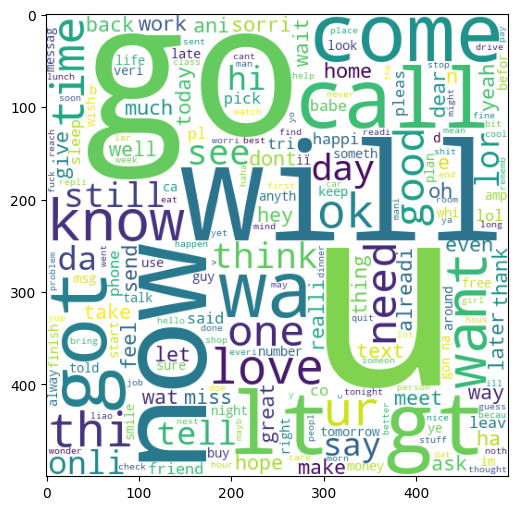

In [84]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [85]:
df.head()

Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go until jurong point crazi avail onli in bugi...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri in 2 a wkli comp to win fa cup fina...  
3         13              1        u dun say so earli hor u c alreadi then say  
4         15              1  nah i do think he goe to usf he live around he...

In [86]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [87]:
len(spam_corpus)

14475

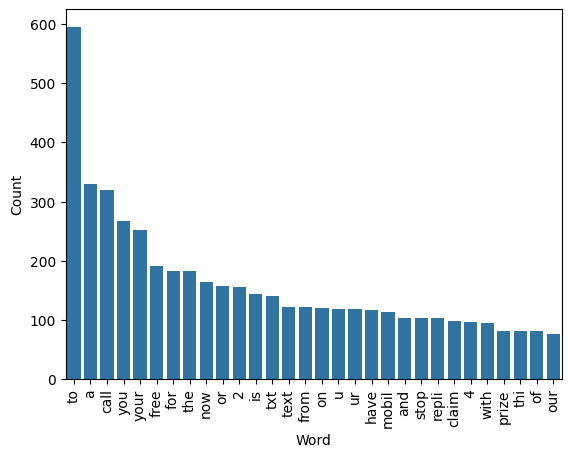

In [88]:
import matplotlib.pyplot as plt
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Plotting
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

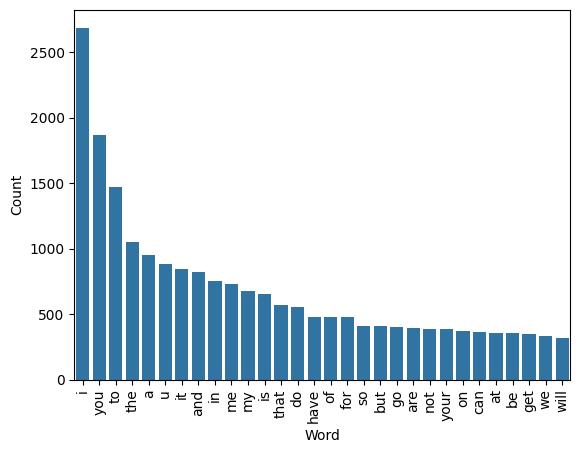

In [90]:
import matplotlib.pyplot as plt
from collections import Counter
word_counts = Counter(ham_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Plotting
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
df.head()

Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go until jurong point crazi avail onli in bugi...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri in 2 a wkli comp to win fa cup fina...  
3         13              1        u dun say so earli hor u c alreadi then say  
4         15              1  nah i do think he goe to usf he live around he...

# Building the model

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
X.shape

(5169, 3000)

In [95]:
y = df['Target'].values

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8771760154738878
[[792 104]
 [ 23 115]]
0.5251141552511416


In [101]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [102]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


In [103]:
!pip install xgboost

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [106]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [107]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [108]:
train_classifier(svc,X_train, y_train, X_test, y_test)

(0.9816247582205029, 0.983739837398374)

In [109]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8421052631578947
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9459459459459459
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.928
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9180327868852459
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9682539682539683


In [110]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [111]:
performance_df

Algorithms  Accuracy  Precision
0         SVC  0.981625   0.983740
1          KN  0.907157   1.000000
2          NB  0.968085   1.000000
3          DT  0.929400   0.842105
4          LR  0.962282   0.945946
5          RF  0.970986   1.000000
6    AdaBoost  0.970019   0.928000
7         BgC  0.965184   0.918033
8         ETC  0.978723   0.983333
9        GBDT  0.959381   0.952830
10        xgb  0.980658   0.968254

In [113]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithms')

In [114]:
performance_df1

Algorithms   variable     value
0         SVC   Accuracy  0.981625
1          KN   Accuracy  0.907157
2          NB   Accuracy  0.968085
3          DT   Accuracy  0.929400
4          LR   Accuracy  0.962282
5          RF   Accuracy  0.970986
6    AdaBoost   Accuracy  0.970019
7         BgC   Accuracy  0.965184
8         ETC   Accuracy  0.978723
9        GBDT   Accuracy  0.959381
10        xgb   Accuracy  0.980658
11        SVC  Precision  0.983740
12         KN  Precision  1.000000
13         NB  Precision  1.000000
14         DT  Precision  0.842105
15         LR  Precision  0.945946
16         RF  Precision  1.000000
17   AdaBoost  Precision  0.928000
18        BgC  Precision  0.918033
19        ETC  Precision  0.983333
20       GBDT  Precision  0.952830
21        xgb  Precision  0.968254

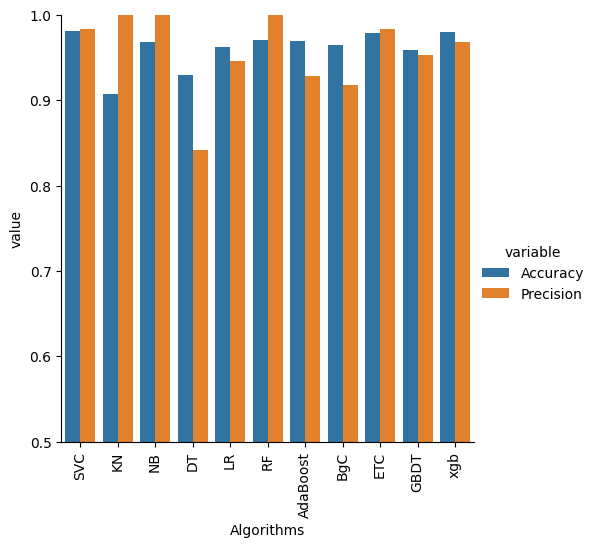

In [115]:
sns.catplot(x='Algorithms', y='value', hue='variable', data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [124]:
temp_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000')

In [125]:
new_df= performance_df.merge(temp_df,on='Algorithms')

In [126]:
new_df_scaled = new_df.merge(temp_df,on='Algorithms')

In [127]:
temp_df=pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy_num_chars':accuracy_scores, 'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars')

In [128]:
new_df_scaled.merge(temp_df,on='Algorithms')

Algorithms  Accuracy  Precision  Accuracy_max_ft_3000_x  \
0         SVC  0.981625   0.983740                0.981625   
1          KN  0.907157   1.000000                0.907157   
2          NB  0.968085   1.000000                0.968085   
3          DT  0.929400   0.842105                0.929400   
4          LR  0.962282   0.945946                0.962282   
5          RF  0.970986   1.000000                0.970986   
6    AdaBoost  0.970019   0.928000                0.970019   
7         BgC  0.965184   0.918033                0.965184   
8         ETC  0.978723   0.983333                0.978723   
9        GBDT  0.959381   0.952830                0.959381   
10        xgb  0.980658   0.968254                0.980658   

    Precision_max_ft_3000_x  Accuracy_max_ft_3000_y  Precision_max_ft_3000_y  \
0                  0.983740                0.981625                 0.983740   
1                  1.000000                0.907157                 1.000000   
2                  1.000000                0.968085                 1.000000   
3                  0.842105                0.929400                 0.842105   
4                  0.945946                0.962282                 0.945946   
5                  1.000000                0.970986                 1.000000   
6                  0.928000                0.970019                 0.928000   
7                  0.918033                0.965184                 0.918033   
8                  0.983333                0.978723                 0.983333   
9                  0.952830                0.959381                 0.952830   
10                 0.968254                0.980658                 0.968254   

    Accuracy_num_chars  Precision_num_chars  
0             0.981625             0.983740  
1             0.907157             1.000000  
2             0.968085             1.000000  
3             0.929400             0.842105  
4             0.962282             0.945946  
5             0.970986             1.000000  
6             0.970019             0.928000  
7             0.965184             0.918033  
8             0.978723             0.983333  
9             0.959381             0.952830  
10            0.980658             0.968254

In [129]:
svc = SVC(kernel='sigmoid',gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [130]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [131]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [132]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [133]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [134]:
from sklearn.ensemble import StackingClassifier

In [135]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [136]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [137]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [138]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ['Sample text 1', 'Sample text 2', 'Sample text 3']
y_train = [0, 1, 0]
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb, model_file)